EPOCHS:0
loss_val:30.407219660650757
loss_train:30.41180633932448
EPOCHS:1
loss_val:16.50290733631788
loss_train:16.50651277377352
EPOCHS:2
loss_val:9.007180182127813
loss_train:9.010310528042718
EPOCHS:3
loss_val:4.975006448608216
loss_train:4.977987006298436
EPOCHS:4
loss_val:2.8091798564091968
loss_train:2.812168835840107
EPOCHS:5
loss_val:1.6503451536826619
loss_train:1.6534808119413018
EPOCHS:6
loss_val:1.0305346877252461
loss_train:1.0337752146738626
EPOCHS:7
loss_val:0.7005572005487399
loss_train:0.7038906697752966
EPOCHS:8
loss_val:0.5250903866663463
loss_train:0.5285439940235969
EPOCHS:9
loss_val:0.4317089877606786
loss_train:0.43523163899053574
EPOCHS:10
loss_val:0.38220841374880715
loss_train:0.38575332297789366
EPOCHS:11
loss_val:0.3572664552079584
loss_train:0.36089867233407613
EPOCHS:12
loss_val:0.34384747229279855
loss_train:0.3475358393306524
EPOCHS:13
loss_val:0.33703208730449136
loss_train:0.3407691311258308
EPOCHS:14
loss_val:0.3331603234017735
loss_train:0.336909085

EPOCHS:120
loss_val:0.32838276780208
loss_train:0.3322399551294153
EPOCHS:121
loss_val:0.32870588624295827
loss_train:0.3325676534233121
EPOCHS:122
loss_val:0.32808784123236906
loss_train:0.33193788521619183
EPOCHS:123
loss_val:0.3288141064057507
loss_train:0.33267448770546265
EPOCHS:124
loss_val:0.32887258160432925
loss_train:0.3327418661407407
EPOCHS:125
loss_val:0.32842047554579173
loss_train:0.3323009196387329
EPOCHS:126
loss_val:0.3281700391341144
loss_train:0.33202167537639693
EPOCHS:127
loss_val:0.3283715063902842
loss_train:0.3322177722647846
EPOCHS:128
loss_val:0.3281050924298671
loss_train:0.33192483131035855
EPOCHS:129
loss_val:0.3283664416201254
loss_train:0.33221788834351307
EPOCHS:130
loss_val:0.3283363006412774
loss_train:0.332192043479677
EPOCHS:131
loss_val:0.32848301271817704
loss_train:0.33235472156597085
EPOCHS:132
loss_val:0.3284684566350874
loss_train:0.3323264928152735
EPOCHS:133
loss_val:0.32853525976156606
loss_train:0.33240279136402934
EPOCHS:134
loss_val:0.32

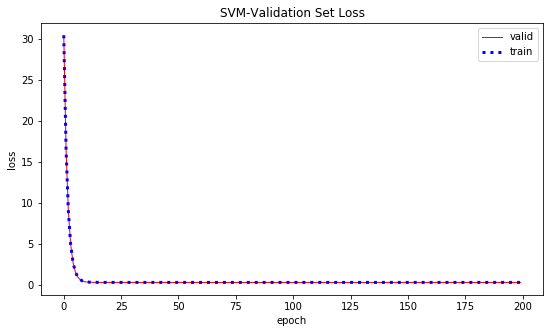

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# load dataset
X_train, Y_train = sklearn.datasets.load_svmlight_file('dataset/a9a', n_features=123)
X_val, Y_val = sklearn.datasets.load_svmlight_file('dataset/a9a.t', n_features=123)
# print(X_train.shape)
# print(Y_train.shape)

# make the row vectors into column vectors
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_val = Y_val.reshape(Y_val.shape[0], 1)


# Hinge Loss Function
def HingeLoss(w, y_, y, C):
    loss = np.maximum(0, (1-y*y_))
    return 0.5 * (np.linalg.norm(w, ord=2)**2) + C*loss.sum() / y.shape[0]

# initialize
loss_val = []
loss_train = []


# make iterations(using mini-batch gradient descent)
def svm(epochs, lr, batch_size, c):
    # initialize parameter w
    w = np.random.normal(size=(123, 1))
    for epoch in range(epochs):
        for i in range(X_train.shape[0] // batch_size):
            # randomly pick samples
            batch_index = np.random.choice(np.arange(X_train.shape[0]), batch_size)
            X = X_train[batch_index]
            Y = Y_train[batch_index]
            # print(X.shape)  //(32,123)
            # print(Y.shape)   //(32,1)

            # calculating gradient step
            x = (1 - Y*X.dot(w) < 0)
            y = Y.copy()
            y[x] = 0

            # gradient, update w
            G = w + (-1)*(X.transpose().dot(y)*c)
            # print(G.shape)
            D = -G
            w = w + lr * D

        # evaluate the loss on the validation set
        output_val = X_val.dot(w)
        output_train = X_train.dot(w)
        loss_val.append(HingeLoss(w, output_val, Y_val, 0.5))
        loss_train.append(HingeLoss(w, output_train, Y_train, 0.5))

        # mark the positive class and the negative class(SVM)
        output_val[output_val > 0] = 1
        output_val[output_val <= 0] = -1

        output_train[output_train > 0] = 1
        output_train[output_train <= 0] = -1

        print('EPOCHS:{}'.format(epoch))
        print('loss_val:{}'.format(loss_val[-1]))
        print('loss_train:{}'.format(loss_train[-1]))

    plot()


def plot():
    plt.figure(figsize=[9, 5])
    plt.title('SVM-Validation Set Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(loss_val, color='red', linewidth=1, label='valid')
    plt.plot(loss_train, color='blue', linewidth=3, label='train', linestyle=':')
    plt.legend()
    plt.savefig('Validation-Set-Loss')
    plt.show()


svm(200, 0.0003 , 32, 0.05)